## Multiclass to distinquish which monkey specie is in the image

## Imports

In [26]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shutil import copyfile
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from keras.models import load_model

## Load the images

In [27]:
# Get Images Paths
train_data = './Training Data/'
test_data  = './Prediction Data/'

# Get Class Names
class_names = sorted(os.listdir(train_data))
print(f"Class Names : {class_names}")

Class Names : ['Bald Uakari', 'Emperor Tamarin', 'Golden Monkey', 'Gray Langur', 'Hamadryas Baboon', 'Mandril', 'Proboscis Monkey', 'Red Howler', 'Vervet Monkey', 'White Faced Saki']


## Visualize the data

Found 1306 images belonging to 10 classes.


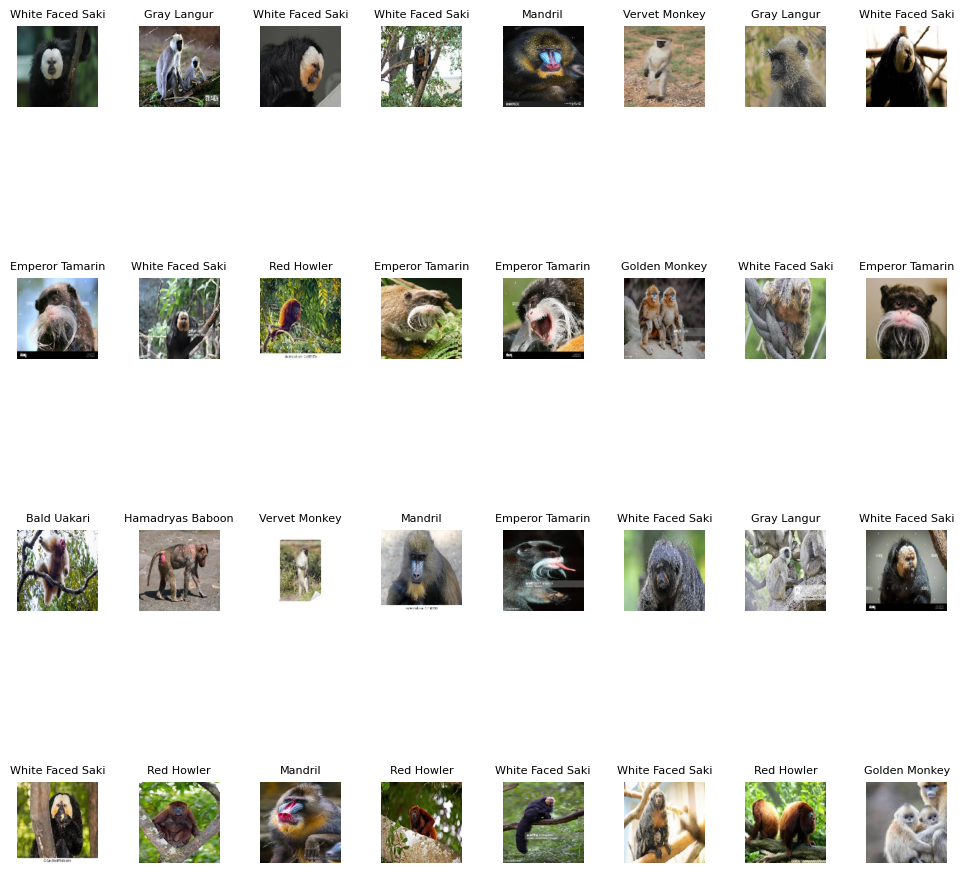

In [28]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Define the ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directory
train_generator = train_datagen.flow_from_directory(
    './Prediction Data/',  # Replace with your path
    target_size=(150, 150),
    batch_size=32,  # Adjust based on your dataset
    class_mode='categorical')

# Get the class labels
class_labels = train_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}  # flip key-value pairs

# Get the first batch of images and labels
images, labels = next(train_generator)

# Define the number of rows and columns for the plot
rows, cols = 4, 8  # Adjust based on your batch size

# Initialize the plot
fig, ax = plt.subplots(rows, cols, figsize=(12,12))
ax = ax.ravel()

for i in range(0, rows*cols):  # create a grid with 4 rows and 8 columns
    ax[i].imshow(images[i])  # plot the image
    label_index = np.argmax(labels[i])
    ax[i].set_title(class_labels[label_index], fontsize=8)  # set the class as title
    ax[i].axis('off')  # remove the axes

plt.subplots_adjust(wspace=0.5, hspace=0.5)  # adjust the space between the images
plt.show()  # display the plot


## Summary